In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import lbg_forecast.hyperparams as hyp
import lbg_forecast.priors as pr
import lbg_forecast.popmodel as pop
import lbg_forecast.emulator as em
import lbg_forecast.tools as tools
import lbg_forecast.nz_sim as nz
import numpy as np
import matplotlib.pyplot as plt

2024-01-18 14:22:45.011307: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-01-18 14:22:45.011322: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-18 14:22:45.011326: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-18 14:22:45.011353: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-18 14:22:45.011367: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
# initalise fsps emulator
model = em.fsps_emulator()
sps_params = model._sps_params

In [4]:
dz, dlogm = 0.1, 0.05
z_min, z_max = 0.0, 15.0
logm_min, logm_max = 7.0, 13.0
grid_params = np.array([dz, dlogm, z_min, z_max, logm_min, logm_max])
z_grid, logm_grid = pr.setup_grids(grid_params)

n_priors_samples = 100
priors = pr.load_priors(z_grid, logm_grid, n_priors_samples, init_sample=10000)
prior_params = [z_grid, logm_grid, priors, grid_params]

In [5]:
hyper_param_bounds = hyp.define_hyperparameter_bounds( 
                           
    zred = np.array([n_priors_samples, 0, 7]),
    logtage = np.array([1, -3, 1]),
    logzsol = np.array([1, -2.5, 0.5]),
    dust1_frac = np.array([1, 0, 1]),
    dust2 = np.array([1, 0, 2]),
    igm_factor = np.array([0, 0, 2]), 
    gas_logu = np.array([1, -4, -1]),
    logfagn = np.array([0, 0, 0]),
    imf1 = np.array([0, 1.3, 1.3]), 
    imf2 = np.array([0, 2.3, 2.3]), 
    imf3 = np.array([0, 2.3, 2.3]), 
    logtau = np.array([1, -4, 1]),
    loga = np.array([1, -3, 3]),
    logb = np.array([1, -3, 3]),
    logmass = np.array([n_priors_samples, 7, 13])

    )

In [6]:
nhyperparams = 100
hyperparameters = hyp.sample_nhyperparameters(hyper_param_bounds, nhyperparams)

In [7]:
# nz histogram parameters
dz = 0.1
minz = 0.0
maxz = 7.0

bins = np.arange(minz, maxz, dz)

nz_data = []
sps_params_list = []
nsamples = 100
ngalaxies = 200000
i = 0
while(i<nsamples):
    sps_params = pop.galaxy_population_model_vec(hyperparameters[np.random.randint(0, nhyperparams)], prior_params, ngalaxies)
    print("run ", i, ":", "SPS Parameters Generated")
    nzs = nz.simulate_nzs(sps_params, model, bins)
    print("run ", i, ":", "N(z)'s Generated")
    sps_params_list.append(sps_params)
    nz_data.append(nzs)
    i+=1

run  0 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  0 : N(z)'s Generated
run  1 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  1 : N(z)'s Generated
run  2 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  2 : N(z)'s Generated
run  3 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  3 : N(z)'s Generated
run  4 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  4 : N(z)'s Generated
run  5 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  5 : N(z)'s Generated
run  6 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  6 : N(z)'s Generated
run  7 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  7 : N(z)'s Generated
run  8 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  8 : N(z)'s Generated
run  9 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  9 : N(z)'s Generated
run  10 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  10 : N(z)'s Generated
run  11 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  11 : N(z)'s Generated
run  12 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  12 : N(z)'s Generated
run  13 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  13 : N(z)'s Generated
run  14 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  14 : N(z)'s Generated
run  15 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  15 : N(z)'s Generated
run  16 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  16 : N(z)'s Generated
run  17 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  17 : N(z)'s Generated
run  18 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  18 : N(z)'s Generated
run  19 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  19 : N(z)'s Generated
run  20 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  20 : N(z)'s Generated
run  21 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  21 : N(z)'s Generated
run  22 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  22 : N(z)'s Generated
run  23 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  23 : N(z)'s Generated
run  24 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  24 : N(z)'s Generated
run  25 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  25 : N(z)'s Generated
run  26 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  26 : N(z)'s Generated
run  27 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  27 : N(z)'s Generated
run  28 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  28 : N(z)'s Generated
run  29 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  29 : N(z)'s Generated
run  30 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  30 : N(z)'s Generated
run  31 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  31 : N(z)'s Generated
run  32 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  32 : N(z)'s Generated
run  33 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  33 : N(z)'s Generated
run  34 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  34 : N(z)'s Generated
run  35 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  35 : N(z)'s Generated
run  36 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  36 : N(z)'s Generated
run  37 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  37 : N(z)'s Generated
run  38 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  38 : N(z)'s Generated
run  39 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  39 : N(z)'s Generated
run  40 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  40 : N(z)'s Generated
run  41 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  41 : N(z)'s Generated
run  42 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  42 : N(z)'s Generated
run  43 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  43 : N(z)'s Generated
run  44 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  44 : N(z)'s Generated
run  45 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  45 : N(z)'s Generated
run  46 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  46 : N(z)'s Generated
run  47 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  47 : N(z)'s Generated
run  48 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  48 : N(z)'s Generated
run  49 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  49 : N(z)'s Generated
run  50 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  50 : N(z)'s Generated
run  51 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  51 : N(z)'s Generated
run  52 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  52 : N(z)'s Generated
run  53 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  53 : N(z)'s Generated
run  54 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  54 : N(z)'s Generated
run  55 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  55 : N(z)'s Generated
run  56 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  56 : N(z)'s Generated
run  57 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  57 : N(z)'s Generated
run  58 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  58 : N(z)'s Generated
run  59 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  59 : N(z)'s Generated
run  60 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  60 : N(z)'s Generated
run  61 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  61 : N(z)'s Generated
run  62 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  62 : N(z)'s Generated
run  63 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  63 : N(z)'s Generated
run  64 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  64 : N(z)'s Generated
run  65 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  65 : N(z)'s Generated
run  66 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  66 : N(z)'s Generated
run  67 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  67 : N(z)'s Generated
run  68 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  68 : N(z)'s Generated
run  69 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  69 : N(z)'s Generated
run  70 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  70 : N(z)'s Generated
run  71 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  71 : N(z)'s Generated
run  72 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  72 : N(z)'s Generated
run  73 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  73 : N(z)'s Generated
run  74 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  74 : N(z)'s Generated
run  75 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  75 : N(z)'s Generated
run  76 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  76 : N(z)'s Generated
run  77 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  77 : N(z)'s Generated
run  78 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  78 : N(z)'s Generated
run  79 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  79 : N(z)'s Generated
run  80 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  80 : N(z)'s Generated
run  81 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  81 : N(z)'s Generated
run  82 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  82 : N(z)'s Generated
run  83 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  83 : N(z)'s Generated
run  84 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  84 : N(z)'s Generated
run  85 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  85 : N(z)'s Generated
run  86 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  86 : N(z)'s Generated
run  87 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  87 : N(z)'s Generated
run  88 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  88 : N(z)'s Generated
run  89 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:363: RuntimeWarning: overflow encountered in multiply
  obsFluxes = fluxes * (1 + rng.normal(scale=nsr))


run  89 : N(z)'s Generated
run  90 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  90 : N(z)'s Generated
run  91 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  91 : N(z)'s Generated
run  92 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  92 : N(z)'s Generated
run  93 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  93 : N(z)'s Generated
run  94 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  94 : N(z)'s Generated
run  95 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  95 : N(z)'s Generated
run  96 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  96 : N(z)'s Generated
run  97 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  97 : N(z)'s Generated
run  98 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:205: RuntimeWarning: overflow encountered in square
  nsrRandSingleExp = np.sqrt((0.04 - gamma) * x + gamma * x**2)
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  98 : N(z)'s Generated
run  99 : SPS Parameters Generated


/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/photerr/model.py:362: RuntimeWarning: overflow encountered in power
  fluxes = 10 ** (mags / -2.5)


run  99 : N(z)'s Generated


In [8]:
#tools.plot_galaxy_population(sps_params_list[9])

In [9]:
def plot_realisation(realisation, nz_data, bins, alpha):
    
    plt.bar(bins[:-1], nz_data[realisation][0], width=np.diff(bins), edgecolor="black", align="edge", alpha=alpha, lw=0.5, color = 'blue')
    plt.bar(bins[:-1], nz_data[realisation][1], width=np.diff(bins), edgecolor="black", align="edge", alpha=alpha, lw=0.5, color = 'red')
    plt.bar(bins[:-1], nz_data[realisation][2], width=np.diff(bins), edgecolor="black", align="edge", alpha=alpha, lw=0.5, color = 'green' )

def plot_realisations(nsamples, nz_data, bins, alpha):

    i = 0
    while(i < nsamples):
        plot_realisation(i, nz_data, bins, alpha)
        i+=1

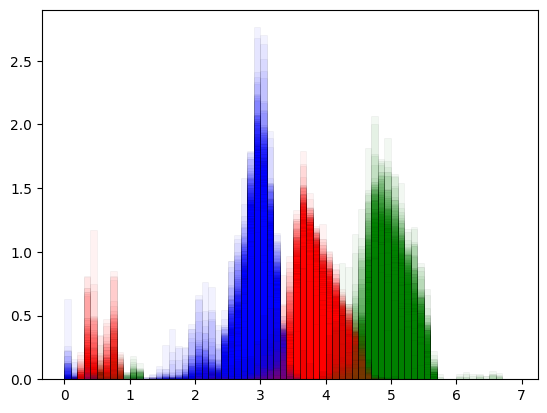

In [10]:
plot_realisations(nsamples, nz_data, bins, 0.05)

In [11]:
np.save("nzs.npy", np.asarray(nz_data))
np.save("sps_params.npy", np.asarray(sps_params_list))